## Dependencies

Listed here:
* https://duckdb.org/docs/guides/python/jupyter.html

In [2]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

/var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_20651/3487390124.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/me/jaanli/american_community_survey_data_build_tool/.venv/lib/python3.11/site-packages/sql/traits.py:20: FutureWarning: named_parameters: boolean values are now deprecated. Value True will be treated as "enabled". 
Please use a valid option: "warn", "enabled", or "disabled". 
For more information, see the docs: https://jupysql.ploomber.io/en/latest/api/configuration.html#named-parameters
  warnings.warn(


In [3]:
import yaml

yaml_path = '../american_community_survey/dbt_project.yml'
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

output_path = config['vars']['output_path']
print(output_path)

~/data/american_community_survey


In [4]:
%%sql 
SELECT * FROM read_parquet(['~/data/american_community_survey/psam_husa.parquet', '~/data/american_community_survey/psam_pusa.parquet'], union_by_name=True)

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,H,2022GQ0000031,6,02803,3,01,1000000.0,1042311,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H,2022GQ0000111,6,02000,3,01,1000000.0,1042311,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H,2022GQ0000200,6,02803,3,01,1000000.0,1042311,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H,2022GQ0000261,6,01100,3,01,1000000.0,1042311,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,2022GQ0000296,6,01502,3,01,1000000.0,1042311,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543377,P,2022HU1446341,6,01900,3,28,NaN,1042311,NaN,NaN,...,87.0,70.0,20.0,27.0,192.0,195.0,41.0,82.0,167.0,95.0
2543378,P,2022HU1446341,6,01900,3,28,NaN,1042311,NaN,NaN,...,88.0,81.0,23.0,29.0,195.0,174.0,33.0,59.0,154.0,87.0
2543379,P,2022HU1446341,6,01900,3,28,NaN,1042311,NaN,NaN,...,62.0,66.0,15.0,29.0,159.0,109.0,23.0,47.0,102.0,60.0
2543380,P,2022HU1446384,6,01800,3,28,NaN,1042311,NaN,NaN,...,35.0,11.0,10.0,10.0,34.0,39.0,30.0,33.0,41.0,13.0


In [5]:
df = _

Text(0.5, 1.0, 'Age of the householder')

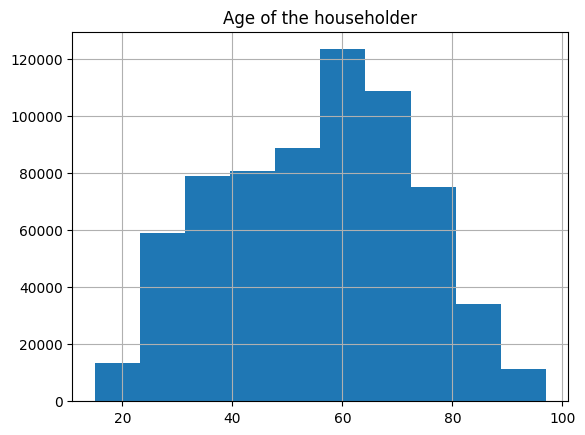

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['HHLDRAGEP'].hist(ax=ax)
ax.set_title('Age of the householder') # from 

